In [183]:
import numpy as np
import os
import pandas as pd 
import matplotlib.pyplot as plt

os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project')
from Modules.support_functions import *

In [185]:
#Import Schizophrenia data
os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project/Data/psykose')
ts_features_c = pd.read_csv('ts_features_control.csv')
ts_features_p = pd.read_csv('ts_features_patient.csv')
ts_features = ts_features_c.append(ts_features_p)
ts_features = ts_features.reset_index()

In [200]:
ts_features.columns

Index(['index', 'Unnamed: 0', 'frequency', 'nperiods', 'seasonal_period',
       'trend', 'spike', 'linearity', 'curvature', 'e_acf1', 'e_acf10',
       'seasonal_strength', 'peak', 'trough', 'entropy', 'x_acf1', 'x_acf10',
       'diff1_acf1', 'diff1_acf10', 'diff2_acf1', 'diff2_acf10', 'seas_acf1',
       'condition', 'max_kl_shift', 'time_kl_shift', 'ARCH.LM',
       'max_level_shift', 'time_level_shift', 'max_var_shift',
       'time_var_shift', 'nonlinearity', 'unitroot_kpss', 'arch_acf',
       'garch_acf', 'arch_r2', 'garch_r2', 'lumpiness', 'stability',
       'crossing_points', 'histogram_mode', 'cluster'],
      dtype='object')

In [202]:
ts_features = ts_features.drop(['index', 'frequency', 'Unnamed: 0','nperiods','seasonal_period' ], axis=1)

In [203]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
ts_features.iloc[:,:-1]= StandardScaler().fit_transform(ts_features.iloc[:,:-1])

# pca of features spaces 
pca = KernelPCA(n_components=2, kernel='linear')
principalComponents_all = pca.fit_transform(ts_features.iloc[:,:-1])
principalDf = pd.DataFrame(data = principalComponents_all
             , columns = ['principal component 1', 'principal component 2'])

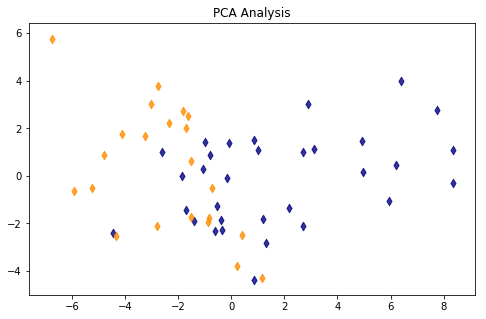

In [221]:
principalDf['cond'] =  ts_features.condition
fig = plt.figure(figsize=(8,5))
color = ['darkorange' if x>0 else 'navy' for x in principalDf['cond']]
shape = ['d' if y>0 else 'd' for y in principalDf['cond']]
for x, y, c, m in zip(principalDf['principal component 1'], principalDf['principal component 2'], color, shape):
    plt.scatter(x, y, alpha=0.8, c=c,marker=m)  
    plt.title('PCA Analysis')


In [205]:
## Analyse the patients dataset for subclusters
from sklearn.cluster import KMeans
ts_features_p.iloc[:,:-1]= StandardScaler().fit_transform(ts_features_p.iloc[:,:-1])
principalComponents_all = pca.fit_transform(ts_features_p.iloc[:,:-1])
principalDf_p = pd.DataFrame(data = principalComponents_all
             , columns = ['principal component 1', 'principal component 2'])
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_res = kmeans.fit_predict(principalDf_p)
principalDf_p['cluster'] = kmeans_res+1

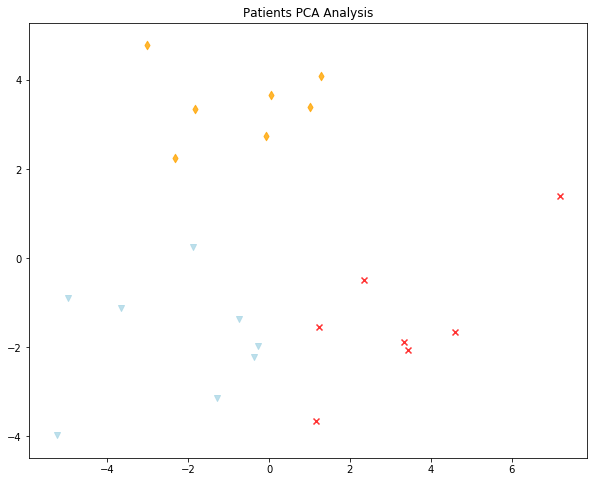

In [222]:
color = ['orange' if x==2  else 'lightblue' if x == 1 else 'red' for x in principalDf_p['cluster'] ]
shape = ['d' if y==2 else 'v' if y==1 else 'x'for y in principalDf_p['cluster']]
fig = plt.figure(figsize=(10,8))
for x, y, c, m in zip(principalDf_p['principal component 1'], principalDf_p['principal component 2'], color, shape):
    plt.scatter(x, y, alpha=0.8, c=c,marker=m)  
    plt.title('Patients PCA Analysis')


In [217]:
## Combining both results 
principalDf['cluster'] = 0
binn = principalDf_p['cluster'].copy()
binn.index = range((len(principalDf)-len(principalDf_p)),len(principalDf))
principalDf['cluster'].iloc[(len(principalDf)-len(principalDf_p)):] = binn

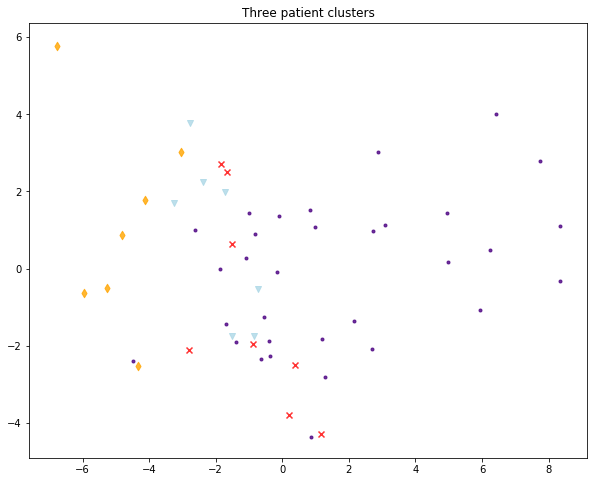

In [223]:
color = ['orange' if x==3  else 'lightblue' if x == 2 else 'red'  if x == 1 else 'indigo'  for x in principalDf['cluster'] ]
shape = ['d' if x==3  else 'v' if x == 2 else 'x'if x == 1 else '.' for x in principalDf['cluster'] ]
fig = plt.figure(figsize=(10,8))
for x, y, c, m in zip(principalDf['principal component 1'], principalDf['principal component 2'], color, shape):
    plt.scatter(x, y, alpha=0.8, c=c,marker=m)  
    plt.title('Three patient clusters')


In [192]:
## The PCA Cluster analysis reveals that one specific cluster of patients is similar to the control group
## The other two cluster are seperable! 
## Goal: Identify the relevant time series features to achieve the best classification. 
## Comment: Kernel PCA has been evaluated, but no improvment 

In [173]:
## Oranged colored instances  
ts_features_p.loc[np.array(principalDf[principalDf['cluster']>2].index)-32]

,Unnamed: 0,trend,spike,linearity,curvature,e_acf1,e_acf10,seasonal_strength,peak,trough,entropy,x_acf1,x_acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,seas_acf1,condition
0,-1.655032,0.364131,-0.974423,-0.042012,-0.042224,1.341810,1.541343,0.015545,-0.268747,-2.062676,-0.695826,1.173159,0.911597,1.435778,-1.345627,1.354280,-1.375570,0.446751,1
9,-0.236433,-0.732431,-0.216736,-0.251838,1.000605,0.749670,-0.111685,-0.212531,-0.360243,0.227398,0.562715,0.421119,-0.447796,1.234437,-1.231535,0.438807,-0.362872,-0.287923,1
11,0.078811,-1.593408,0.674368,1.071079,1.269071,-0.080913,-0.795065,-0.373943,-0.787228,0.233109,1.112728,-0.464190,-1.042110,0.753521,-0.749327,0.907578,-0.993667,-0.944213,1
13,0.394055,-0.840662,-0.435828,0.706285,0.277463,0.544883,0.246533,-0.709827,-1.070432,-1.628647,0.654885,0.067052,-0.502531,0.908572,-0.857510,0.932709,-0.951169,-1.137053,1
14,0.551677,-0.573869,0.438251,0.596228,0.558416,1.363970,1.422308,0.737173,1.243127,0.193133,-1.316981,1.323087,1.139269,2.122126,-1.534353,2.623941,-2.475970,0.525507,1
16,0.866921,0.469836,2.496132,0.790900,-0.922087,1.741985,2.332329,-0.598418,-0.695731,0.564342,-0.708340,1.294447,1.031112,0.826326,-0.990465,0.824931,-0.865917,-1.229563,1
19,1.339788,0.136643,-0.214954,-1.052972,-0.275531,0.737164,0.377639,-1.042578,-0.704445,0.918418,0.379936,0.258048,-0.363475,0.581135,-0.825086,-0.010415,-0.040699,-0.763012,1
20,1.497410,0.406646,-0.116165,-1.302797,0.133404,0.392341,-0.423426,-1.069799,-0.870010,0.906996,0.866499,-0.075880,-0.895298,0.848956,-0.951910,0.814338,-0.885106,-0.818863,1


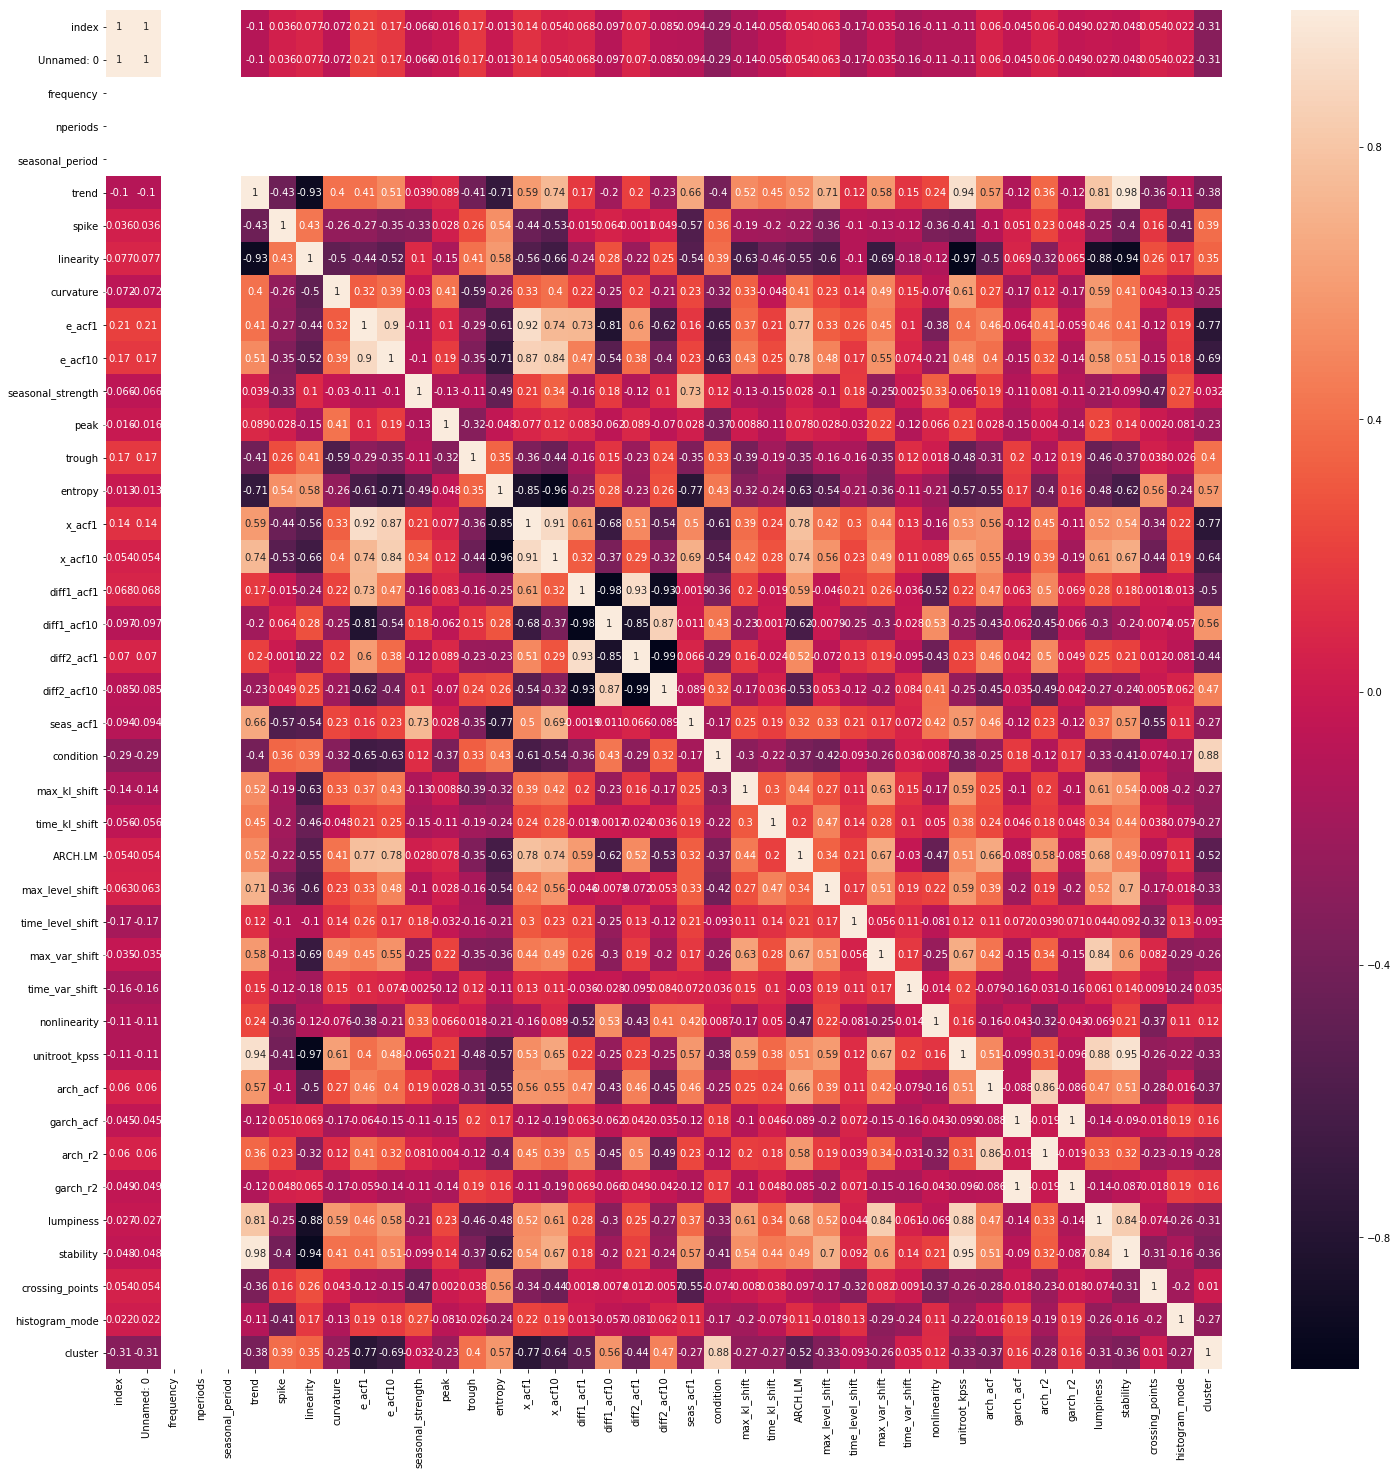

In [194]:
## Check on linear dependencies between features 
ts_features['cluster'] = principalDf['cluster']
import seaborn as sns
corr = ts_features.corr()
fig, ax = plt.subplots(figsize=(25,25))         
sns.heatmap(corr, 
        xticklabels=corr.columns,yticklabels=corr.columns, annot=True)

In [ ]:
## spikeness,e_acf1, e_acf10, entropy, x_acf1, x_acf10 have the highest correlation towards clusters and condition
## observation: trend is highly correlated with seas_acf and x_acf1/10 and neg. corr. entropy
## observation: trend highly NEGATIVE correlated with linearity! 
## Thought: e_acf1, e_acf10 is first autocorrelation coeff. of e_t --> ARCH Model best fit? 